In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PARAM_HVR import mean_rr,mean_hr,sdnn, sdsd, rmssd, rmssd_sdsd, time_domain_analysis, poincare, stress_index, res_index, pns_index
from PARAM_HVR import sns_index, iterative_sd, iterative_mean, frequency_domian, countPairsWithDiffK,kurtose,skewness,relativeRR
from entropy import *

In [4]:
P1_data = pd.read_csv('0. interim/swell/rri/p1.csv')

In [5]:
time_sec = P1_data['Time']
time_min =P1_data['Time']/60
RR = P1_data['rri']

In [6]:
#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit(minute) zurück
#@param zeit soll genau sein d.h in der list "time_min" vorhandeln sein ZB. 1.0002604166666667 für 1min, 5.0002604999999996 für 5min usw 
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_min:
        #print(t)
    
def find_MinuteTime_index(zeit):
    index=0
    for times in time_min:
        index=index+1
        if(zeit==times):
            break
            
    return index-1


#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit(minute) zurück
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_sec:
        #print(t)

def find_SekundeTime_index(zeit):
    index=0
    for times in time_sec:
        index=index+1
        if(zeit==times):
            break
            
    return index-1

In [43]:
#statt per zu wählen sollte eine zufällige werte gewählt werden 
for t in time_min:
        a=t

In [7]:
def rr_schneider(zeitparam):
    sume=0
    arr_list=[]
    index_rr=0
    for t in time_min:
        index_rr=find_MinuteTime_index(t)
        arr_list.append(RR[index_rr])
        index_rr=index_rr+1
        if(t==zeitparam):
            break
    return arr_list
    

In [30]:
RR_10min=rr_schneider(24.37526)
RR_10min

[870.11719,
 885.36996,
 890.18974,
 886.73851,
 877.1782,
 863.6708,
 848.3779699999999,
 833.31187,
 820.09208,
 810.27451,
 804.99293,
 803.12756,
 802.80973,
 802.2873599999999,
 801.04602,
 799.31462,
 797.35604,
 795.98185,
 796.55235,
 800.43161,
 807.49011,
 815.0982799999999,
 820.3883400000001,
 821.36308,
 819.27105,
 816.11717,
 813.73748,
 812.55428,
 812.28499,
 812.64192,
 813.3375,
 814.16169,
 815.10455,
 816.18801,
 817.434,
 818.86447,
 820.49697,
 822.27945,
 824.10395,
 825.86094,
 827.44085,
 828.7294400000001,
 829.6005200000001,
 829.92606,
 829.57805,
 828.4180200000001,
 826.13274,
 822.2642900000001,
 816.35549,
 808.34864,
 798.86525,
 788.59333,
 778.4314400000001,
 769.83751,
 764.3611,
 763.12117,
 765.88013,
 772.1339,
 781.3784099999999,
 793.1095799999999,
 806.6714,
 820.07685,
 830.64985,
 835.76986,
 835.06217,
 830.99269,
 826.2088,
 822.3962700000001,
 818.41264,
 812.5981400000001,
 803.77282,
 793.71508,
 785.32984,
 781.11265,
 779.62999,
 777.

In [31]:
#convert List of Objects to Data Frame 
from pandas import DataFrame

def List_to_DataFrame(liste,colName):
    df_10 = DataFrame (liste,columns=[colName])
    rri_reshap = df_10[colName]
    return rri_reshap

In [32]:
RR_10=List_to_DataFrame(RR_10min,'10min rri')
RR_10

0       870.11719
1       885.36996
2       890.18974
3       886.73851
4       877.17820
          ...    
5841    856.52474
5842    839.96003
5843    829.79721
5844    824.20435
5845    820.02938
Name: 10min rri, Length: 5846, dtype: float64

In [33]:
#Die Methode "random_rr" gibt eine zufällige liste von X elements entlang der rri-liste zurück
# X ist ein Zeitindex (Interger). ZB. für ein Zeitindex X=2 wird eine liste von rri mit 2 elementen generiert

def random_rr(X):
    liste=[]
    rr=RR_10.sample(X)
    for line in rr:
        liste+=[line]
    return liste

In [34]:
'''
#berechnet die Summe von elementen einer liste 
def somme(liste):
    sume=0
    for elt in liste:
        sume+=elt
    return sume
'''

'\n#berechnet die Summe von elementen einer liste \ndef somme(liste):\n    sume=0\n    for elt in liste:\n        sume+=elt\n    return sume\n'

In [35]:
# generiert eine liste von rri-elementen für eine gegebene zeit(minute)
def rand_rr_MinuteInterval(zeit):
    idx=find_MinuteTime_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

# generiert eine liste von rri-elementen für eine gegebene zeit(sekunde)
def rand_rr_SekundeInterval(zeit):
    idx=find_SekundeTime_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

In [36]:
print('min_RR_interval_list')
rand_rr_min=rand_rr_MinuteInterval(1.0002604166666667)
rand_rr_min

min_RR_interval_list


[960.79212,
 992.34383,
 898.2815800000001,
 823.01411,
 845.2433300000001,
 736.5165,
 718.1279900000001,
 971.8812,
 875.42522,
 866.08199,
 949.91764,
 932.8516099999999,
 943.46111,
 797.12552,
 772.9209900000001,
 895.28178,
 967.9911199999999,
 758.97198,
 854.21656,
 829.92606,
 985.2121300000001,
 976.68961,
 948.35999,
 843.2994199999999,
 876.0182,
 903.17472,
 839.1945300000001,
 942.5032199999999,
 799.92068,
 895.33056,
 1015.8025,
 968.932,
 856.4642699999999,
 1039.4798,
 910.57865,
 960.1134800000001,
 987.2760800000001,
 1079.1382,
 887.10461,
 940.2122400000001,
 802.35536,
 724.07282,
 747.2489999999999,
 798.3639999999999,
 795.3387299999999,
 1004.4017,
 957.5900800000001,
 1067.6387,
 830.84028,
 906.0618699999999,
 951.36362,
 884.69326,
 734.49618,
 1006.1446,
 878.6069699999999,
 964.5324300000001,
 704.77842,
 1014.085,
 707.44742,
 850.0636099999999,
 970.90625,
 914.6863300000001,
 1021.7279,
 773.46802,
 980.16299,
 724.08747,
 1007.7597,
 751.6535700000001

In [37]:
#Methode to calculate the sample entropy(Package entropy)
#für eine eingegebene zeitintervall @param "minute/sekunde" wird zufällig entlang der gesamgten RR-länge diese zeitintervall genommen und 
#es wird der sample entropie davon berechnet. Der zufallexperiment wird 50 mal wiederholt und  es wird jedesmal die entropieberechnung 
#in einer liste hinzugefügt und die liste wird zurückgegeben

#print('interval_entropy_list in minute')
def rand_entrop(minute, ziehung=50):
    rand_entropy_list=[]
    for n in range(1,ziehung):
        rand_rr=rand_rr_MinuteInterval(minute)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list


#print('interval_entropy_list in seconde')
def rand_entropy(sekunde,ziehung=50):
    rand_entropy_list=[]
    for n in range(1,ziehung):
        rand_rr=rand_rr_SekundeInterval(sekunde)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list



In [38]:
samp_entrop=sample_entropy(RR_10, order=2, metric='chebyshev')
print('sample_entropy for 10min RR: '+ str(samp_entrop)+'\n')

#  9*60 wie oft man die ziehung machen kann 
# in abhangigkeit von die bedingung dass man die sample zieht, so dass keine überlapung entsteht
# 

RR_1min_inter=rand_entrop(1.0002604166666667,9*60)
print('Sample entropy 1min RR intervals: '+'\n' +str(RR_1min_inter)+'\n')
print('mean of entropy 1min RR intervals: '+ str(mean_rr(RR_1min_inter))+'\n')

RR_2min_inter=rand_entrop(2.0002605,8*60)
print('Sample entropy 2min RR intervals: '+'\n' + str(RR_2min_inter)+'\n')
print('mean of entropy 2min RR intervals: '+ str(mean_rr(RR_2min_inter))+'\n')

RR_3min_inter=rand_entrop(3.0002605000000004,7*60)
print('Sample entropy 3min RR intervals: '+'\n' + str(RR_3min_inter)+'\n')
print('mean of entropy 3min RR intervals: '+ str(mean_rr(RR_3min_inter))+'\n')

RR_4min_inter=rand_entrop(4.0002604999999996,6*60)
print('Sample entropy 4min RR intervals: '+'\n' + str(RR_4min_inter)+'\n')
print('mean of entropy 4min RR intervals: '+ str(mean_rr(RR_4min_inter))+'\n')

RR_5min_inter=rand_entrop(5.0002604999999996,5*60)
print('Sample entropy 5min RR intervals: '+'\n' + str(RR_5min_inter)+'\n')
print('mean of entropy 5min RR intervals: '+ str(mean_rr(RR_5min_inter))+'\n')

#RR_10min_inter=rand_entrop(10.0002605)
#print('Sample entropy 10min RR intervals: '+'\n' + str(RR_10min_inter)+'\n')
#print('mean of entropy 10min RR intervals: '+ str(mean_rr(RR_10min_inter)))

#RR_1min_inter     

sample_entropy for 10min RR: 0.44660810627889086

Sample entropy 1min RR intervals: 
[2.183581800932433, 2.290750635347043, 2.10468832441462, 1.9984724791461688, 1.993338842626424, 2.25279442849103, 2.404145293143542, 2.1886408336448278, 1.8638127868681125, 2.0794415416798357, 2.21375387928743, 2.3801433273399204, 2.160378303950253, 2.382627800667582, 2.220964564639292, 2.116535666086077, 2.0275214845014764, 2.5257286443082556, 2.254575873807685, 1.924110920712729, 2.3690748342628787, 2.2823823856765264, 2.2262121142094715, 2.2055233801509146, 2.22132212891528, 2.409194828052304, 2.4468347018385925, 2.2091650177081372, 2.1550019469138726, 2.0763881041929455, 2.2472349979108808, 2.178072145121463, 2.3608540011180215, 2.054680991999184, 2.3470368555648795, 2.1972245773362196, 2.172531964745848, 2.1630556817209694, 2.27397455895278, 2.1657259102768482, 2.094945728215801, 2.1552948841980952, 2.151762203259462, 2.120263536200091, 2.2180277049659827, 2.164532215650677, 2.3470368555648795, 2.

Sample entropy 3min RR intervals: 
[2.184497132804121, 2.1155465463219523, 2.1756254655327574, 2.193280995704847, 2.225420277746177, 2.195401422774704, 2.1463109480885803, 2.149668219615716, 2.1590760860823996, 2.1414921322081524, 2.175579976870799, 2.213149972456543, 2.1397805716051392, 2.091200774592911, 2.211056056484681, 2.1978365724593596, 2.1680731972174696, 2.107429234183248, 2.213965190474125, 2.198749665324361, 2.1444319235228972, 2.1906671767900603, 2.152234291076562, 2.1707885797574247, 2.1882377071696366, 2.229364301143968, 2.2091819255939757, 2.13644638107427, 2.181758757160634, 2.2142221537047906, 2.1948639978983646, 2.257087049854846, 2.2331682231967354, 2.236397272434703, 2.242241963086577, 2.1249930750190993, 2.1608569331653444, 2.1822989271195437, 2.1780278270655415, 2.1536931266536423, 2.1656555472033605, 2.1737290727350067, 2.0647656105305088, 2.156035460400202, 2.176133642574092, 2.190179058836611, 2.1649206867838333, 2.2047504830365665, 2.21205339400968, 2.1887619

Sample entropy 5min RR intervals: 
[2.1448183413072983, 2.152038513876861, 2.15665064300757, 2.198194980129498, 2.1909960700671576, 2.2099340372461738, 2.1888157308931406, 2.195271451715337, 2.1579237808962772, 2.2251228996080585, 2.232171607413454, 2.1470644844755515, 2.167323097110944, 2.1695509516850535, 2.1952309771795786, 2.159987357855737, 2.2022827570635717, 2.1914076233804773, 2.200001277071059, 2.1658620068753995, 2.192970609419513, 2.20049963176639, 2.17398245780248, 2.123411808136671, 2.1536149824250246, 2.172927588782417, 2.199196964563424, 2.0749157162216316, 2.1523651981522764, 2.1512944266780334, 2.1584270550483313, 2.1555774758129544, 2.200135787543678, 2.1484654493083766, 2.11815029486858, 2.166547012405715, 2.140328499865466, 2.1236148048802947, 2.2217760038805205, 2.1431861200488367, 2.16192495730877, 2.17971451082629, 2.1617041650489384, 2.1344767687669752, 2.187774995977732, 2.208586491480258, 2.214632834642862, 2.1491676024950683, 2.1773689333928, 2.16681991481020

In [39]:
for t_sec in time_sec:
    print(t_sec)

1.265625
1.515625
1.765625
2.015625
2.265625
2.515625
2.765625
3.015625
3.265625
3.515625
3.765625
4.015625
4.265625
4.515625
4.765625
5.015625
5.265625
5.515625
5.765625
6.015625
6.265625
6.515625
6.765625
7.015625
7.265625
7.515625
7.765625
8.015625
8.265625
8.515625
8.765625
9.015625
9.265625
9.515625
9.765625
10.015625
10.265625
10.515625
10.765625
11.015625
11.265625
11.515625
11.765625
12.015625
12.265625
12.515625
12.765625
13.015625
13.265625
13.515625
13.765625
14.015625
14.265625
14.515625
14.765625
15.015625
15.265625
15.515625
15.765625
16.015625
16.265625
16.515625
16.765625
17.015625
17.265625
17.515625
17.765625
18.015625
18.265625
18.515625
18.765625
19.015625
19.265625
19.515625
19.765625
20.015625
20.265625
20.515625
20.765625
21.015625
21.265625
21.515625
21.765625
22.015625
22.265625
22.515625
22.765625
23.015625
23.265625
23.515625
23.765625
24.015625
24.265625
24.515625
24.765625
25.015625
25.265625
25.515625
25.765625
26.015625
26.265625
26.515625
26.765625
27.01

422.26563
422.51563
422.76563
423.01563
423.26563
423.51563
423.76563
424.01563
424.26563
424.51563
424.76563
425.01563
425.26563
425.51563
425.76563
426.01563
426.26563
426.51563
426.76563
427.01563
427.26563
427.51563
427.76563
428.01563
428.26563
428.51563
428.76563
429.01563
429.26563
429.51563
429.76563
430.01563
430.26563
430.51563
430.76563
431.01563
431.26563
431.51563
431.76563
432.01563
432.26563
432.51563
432.76563
433.01563
433.26563
433.51563
433.76563
434.01563
434.26563
434.51563
434.76563
435.01563
435.26563
435.51563
435.76563
436.01563
436.26563
436.51563
436.76563
437.01563
437.26563
437.51563
437.76563
438.01563
438.26563
438.51563
438.76563
439.01563
439.26563
439.51563
439.76563
440.01563
440.26563
440.51563
440.76563
441.01563
441.26563
441.51563
441.76563
442.01563
442.26563
442.51563
442.76563
443.01563
443.26563
443.51563
443.76563
444.01563
444.26563
444.51563
444.76563
445.01563
445.26563
445.51563
445.76563
446.01563
446.26563
446.51563
446.76563
447.01563


691.76563
692.01563
692.26563
692.51563
692.76563
693.01563
693.26563
693.51563
693.76563
694.01563
694.26563
694.51563
694.76563
695.01563
695.26563
695.51563
695.76563
696.01563
696.26563
696.51563
696.76563
697.01563
697.26563
697.51563
697.76563
698.01563
698.26563
698.51563
698.76563
699.01563
699.26563
699.51563
699.76563
700.01563
700.26563
700.51563
700.76563
701.01563
701.26563
701.51563
701.76563
702.01563
702.26563
702.51563
702.76563
703.01563
703.26563
703.51563
703.76563
704.01563
704.26563
704.51563
704.76563
705.01563
705.26563
705.51563
705.76563
706.01563
706.26563
706.51563
706.76563
707.01563
707.26563
707.51563
707.76563
708.01563
708.26563
708.51563
708.76563
709.01563
709.26563
709.51563
709.76563
710.01563
710.26563
710.51563
710.76563
711.01563
711.26563
711.51563
711.76563
712.01563
712.26563
712.51563
712.76563
713.01563
713.26563
713.51563
713.76563
714.01563
714.26563
714.51563
714.76563
715.01563
715.26563
715.51563
715.76563
716.01563
716.26563
716.51563


1065.7656
1066.0156
1066.2656
1066.5156
1066.7656
1067.0156
1067.2656
1067.5156
1067.7656
1068.0156
1068.2656
1068.5156
1068.7656
1069.0156
1069.2656
1069.5156
1069.7656
1070.0156
1070.2656
1070.5156
1070.7656
1071.0156
1071.2656
1071.5156
1071.7656
1072.0156
1072.2656
1072.5156
1072.7656
1073.0156
1073.2656
1073.5156
1073.7656
1074.0156
1074.2656
1074.5156
1074.7656
1075.0156
1075.2656
1075.5156
1075.7656
1076.0156
1076.2656
1076.5156
1076.7656
1077.0156
1077.2656
1077.5156
1077.7656
1078.0156
1078.2656
1078.5156
1078.7656
1079.0156
1079.2656
1079.5156
1079.7656
1080.0156
1080.2656
1080.5156
1080.7656
1081.0156
1081.2656
1081.5156
1081.7656
1082.0156
1082.2656
1082.5156
1082.7656
1083.0156
1083.2656
1083.5156
1083.7656
1084.0156
1084.2656
1084.5156
1084.7656
1085.0156
1085.2656
1085.5156
1085.7656
1086.0156
1086.2656
1086.5156
1086.7656
1087.0156
1087.2656
1087.5156
1087.7656
1088.0156
1088.2656
1088.5156
1088.7656
1089.0156
1089.2656
1089.5156
1089.7656
1090.0156
1090.2656
1090.5156


1547.0156
1547.2656
1547.5156
1547.7656
1548.0156
1548.2656
1548.5156
1548.7656
1549.0156
1549.2656
1549.5156
1549.7656
1550.0156
1550.2656
1550.5156
1550.7656
1551.0156
1551.2656
1551.5156
1551.7656
1552.0156
1552.2656
1552.5156
1552.7656
1553.0156
1553.2656
1553.5156
1553.7656
1554.0156
1554.2656
1554.5156
1554.7656
1555.0156
1555.2656
1555.5156
1555.7656
1556.0156
1556.2656
1556.5156
1556.7656
1557.0156
1557.2656
1557.5156
1557.7656
1558.0156
1558.2656
1558.5156
1558.7656
1559.0156
1559.2656
1559.5156
1559.7656
1560.0156
1560.2656
1560.5156
1560.7656
1561.0156
1561.2656
1561.5156
1561.7656
1562.0156
1562.2656
1562.5156
1562.7656
1563.0156
1563.2656
1563.5156
1563.7656
1564.0156
1564.2656
1564.5156
1564.7656
1565.0156
1565.2656
1565.5156
1565.7656
1566.0156
1566.2656
1566.5156
1566.7656
1567.0156
1567.2656
1567.5156
1567.7656
1568.0156
1568.2656
1568.5156
1568.7656
1569.0156
1569.2656
1569.5156
1569.7656
1570.0156
1570.2656
1570.5156
1570.7656
1571.0156
1571.2656
1571.5156
1571.7656


2012.2656
2012.5156
2012.7656
2013.0156
2013.2656
2013.5156
2013.7656
2014.0156
2014.2656
2014.5156
2014.7656
2015.0156
2015.2656
2015.5156
2015.7656
2016.0156
2016.2656
2016.5156
2016.7656
2017.0156
2017.2656
2017.5156
2017.7656
2018.0156
2018.2656
2018.5156
2018.7656
2019.0156
2019.2656
2019.5156
2019.7656
2020.0156
2020.2656
2020.5156
2020.7656
2021.0156
2021.2656
2021.5156
2021.7656
2022.0156
2022.2656
2022.5156
2022.7656
2023.0156
2023.2656
2023.5156
2023.7656
2024.0156
2024.2656
2024.5156
2024.7656
2025.0156
2025.2656
2025.5156
2025.7656
2026.0156
2026.2656
2026.5156
2026.7656
2027.0156
2027.2656
2027.5156
2027.7656
2028.0156
2028.2656
2028.5156
2028.7656
2029.0156
2029.2656
2029.5156
2029.7656
2030.0156
2030.2656
2030.5156
2030.7656
2031.0156
2031.2656
2031.5156
2031.7656
2032.0156
2032.2656
2032.5156
2032.7656
2033.0156
2033.2656
2033.5156
2033.7656
2034.0156
2034.2656
2034.5156
2034.7656
2035.0156
2035.2656
2035.5156
2035.7656
2036.0156
2036.2656
2036.5156
2036.7656
2037.0156


2421.7656
2422.0156
2422.2656
2422.5156
2422.7656
2423.0156
2423.2656
2423.5156
2423.7656
2424.0156
2424.2656
2424.5156
2424.7656
2425.0156
2425.2656
2425.5156
2425.7656
2426.0156
2426.2656
2426.5156
2426.7656
2427.0156
2427.2656
2427.5156
2427.7656
2428.0156
2428.2656
2428.5156
2428.7656
2429.0156
2429.2656
2429.5156
2429.7656
2430.0156
2430.2656
2430.5156
2430.7656
2431.0156
2431.2656
2431.5156
2431.7656
2432.0156
2432.2656
2432.5156
2432.7656
2433.0156
2433.2656
2433.5156
2433.7656
2434.0156
2434.2656
2434.5156
2434.7656
2435.0156
2435.2656
2435.5156
2435.7656
2436.0156
2436.2656
2436.5156
2436.7656
2437.0156
2437.2656
2437.5156
2437.7656
2438.0156
2438.2656
2438.5156
2438.7656
2439.0156
2439.2656
2439.5156
2439.7656
2440.0156
2440.2656
2440.5156
2440.7656
2441.0156
2441.2656
2441.5156
2441.7656
2442.0156
2442.2656
2442.5156
2442.7656
2443.0156
2443.2656
2443.5156
2443.7656
2444.0156
2444.2656
2444.5156
2444.7656
2445.0156
2445.2656
2445.5156
2445.7656
2446.0156
2446.2656
2446.5156


2777.2656
2777.5156
2777.7656
2778.0156
2778.2656
2778.5156
2778.7656
2779.0156
2779.2656
2779.5156
2779.7656
2780.0156
2780.2656
2780.5156
2780.7656
2781.0156
2781.2656
2781.5156
2781.7656
2782.0156
2782.2656
2782.5156
2782.7656
2783.0156
2783.2656
2783.5156
2783.7656
2784.0156
2784.2656
2784.5156
2784.7656
2785.0156
2785.2656
2785.5156
2785.7656
2786.0156
2786.2656
2786.5156
2786.7656
2787.0156
2787.2656
2787.5156
2787.7656
2788.0156
2788.2656
2788.5156
2788.7656
2789.0156
2789.2656
2789.5156
2789.7656
2790.0156
2790.2656
2790.5156
2790.7656
2791.0156
2791.2656
2791.5156
2791.7656
2792.0156
2792.2656
2792.5156
2792.7656
2793.0156
2793.2656
2793.5156
2793.7656
2794.0156
2794.2656
2794.5156
2794.7656
2795.0156
2795.2656
2795.5156
2795.7656
2796.0156
2796.2656
2796.5156
2796.7656
2797.0156
2797.2656
2797.5156
2797.7656
2798.0156
2798.2656
2798.5156
2798.7656
2799.0156
2799.2656
2799.5156
2799.7656
2800.0156
2800.2656
2800.5156
2800.7656
2801.0156
2801.2656
2801.5156
2801.7656
2802.0156


3159.2656
3159.5156
3159.7656
3160.0156
3160.2656
3160.5156
3160.7656
3161.0156
3161.2656
3161.5156
3161.7656
3162.0156
3162.2656
3162.5156
3162.7656
3163.0156
3163.2656
3163.5156
3163.7656
3164.0156
3164.2656
3164.5156
3164.7656
3165.0156
3165.2656
3165.5156
3165.7656
3166.0156
3166.2656
3166.5156
3166.7656
3167.0156
3167.2656
3167.5156
3167.7656
3168.0156
3168.2656
3168.5156
3168.7656
3169.0156
3169.2656
3169.5156
3169.7656
3170.0156
3170.2656
3170.5156
3170.7656
3171.0156
3171.2656
3171.5156
3171.7656
3172.0156
3172.2656
3172.5156
3172.7656
3173.0156
3173.2656
3173.5156
3173.7656
3174.0156
3174.2656
3174.5156
3174.7656
3175.0156
3175.2656
3175.5156
3175.7656
3176.0156
3176.2656
3176.5156
3176.7656
3177.0156
3177.2656
3177.5156
3177.7656
3178.0156
3178.2656
3178.5156
3178.7656
3179.0156
3179.2656
3179.5156
3179.7656
3180.0156
3180.2656
3180.5156
3180.7656
3181.0156
3181.2656
3181.5156
3181.7656
3182.0156
3182.2656
3182.5156
3182.7656
3183.0156
3183.2656
3183.5156
3183.7656
3184.0156


3636.0156
3636.2656
3636.5156
3636.7656
3637.0156
3637.2656
3637.5156
3637.7656
3638.0156
3638.2656
3638.5156
3638.7656
3639.0156
3639.2656
3639.5156
3639.7656
3640.0156
3640.2656
3640.5156
3640.7656
3641.0156
3641.2656
3641.5156
3641.7656
3642.0156
3642.2656
3642.5156
3642.7656
3643.0156
3643.2656
3643.5156
3643.7656
3644.0156
3644.2656
3644.5156
3644.7656
3645.0156
3645.2656
3645.5156
3645.7656
3646.0156
3646.2656
3646.5156
3646.7656
3647.0156
3647.2656
3647.5156
3647.7656
3648.0156
3648.2656
3648.5156
3648.7656
3649.0156
3649.2656
3649.5156
3649.7656
3650.0156
3650.2656
3650.5156
3650.7656
3651.0156
3651.2656
3651.5156
3651.7656
3652.0156
3652.2656
3652.5156
3652.7656
3653.0156
3653.2656
3653.5156
3653.7656
3654.0156
3654.2656
3654.5156
3654.7656
3655.0156
3655.2656
3655.5156
3655.7656
3656.0156
3656.2656
3656.5156
3656.7656
3657.0156
3657.2656
3657.5156
3657.7656
3658.0156
3658.2656
3658.5156
3658.7656
3659.0156
3659.2656
3659.5156
3659.7656
3660.0156
3660.2656
3660.5156
3660.7656


4046.2656
4046.5156
4046.7656
4047.0156
4047.2656
4047.5156
4047.7656
4048.0156
4048.2656
4048.5156
4048.7656
4049.0156
4049.2656
4049.5156
4049.7656
4050.0156
4050.2656
4050.5156
4050.7656
4051.0156
4051.2656
4051.5156
4051.7656
4052.0156
4052.2656
4052.5156
4052.7656
4053.0156
4053.2656
4053.5156
4053.7656
4054.0156
4054.2656
4054.5156
4054.7656
4055.0156
4055.2656
4055.5156
4055.7656
4056.0156
4056.2656
4056.5156
4056.7656
4057.0156
4057.2656
4057.5156
4057.7656
4058.0156
4058.2656
4058.5156
4058.7656
4059.0156
4059.2656
4059.5156
4059.7656
4060.0156
4060.2656
4060.5156
4060.7656
4061.0156
4061.2656
4061.5156
4061.7656
4062.0156
4062.2656
4062.5156
4062.7656
4063.0156
4063.2656
4063.5156
4063.7656
4064.0156
4064.2656
4064.5156
4064.7656
4065.0156
4065.2656
4065.5156
4065.7656
4066.0156
4066.2656
4066.5156
4066.7656
4067.0156
4067.2656
4067.5156
4067.7656
4068.0156
4068.2656
4068.5156
4068.7656
4069.0156
4069.2656
4069.5156
4069.7656
4070.0156
4070.2656
4070.5156
4070.7656
4071.0156


4460.0156
4460.2656
4460.5156
4460.7656
4461.0156
4461.2656
4461.5156
4461.7656
4462.0156
4462.2656
4462.5156
4462.7656
4463.0156
4463.2656
4463.5156
4463.7656
4464.0156
4464.2656
4464.5156
4464.7656
4465.0156
4465.2656
4465.5156
4465.7656
4466.0156
4466.2656
4466.5156
4466.7656
4467.0156
4467.2656
4467.5156
4467.7656
4468.0156
4468.2656
4468.5156
4468.7656
4469.0156
4469.2656
4469.5156
4469.7656
4470.0156
4470.2656
4470.5156
4470.7656
4471.0156
4471.2656
4471.5156
4471.7656
4472.0156
4472.2656
4472.5156
4472.7656
4473.0156
4473.2656
4473.5156
4473.7656
4474.0156
4474.2656
4474.5156
4474.7656
4475.0156
4475.2656
4475.5156
4475.7656
4476.0156
4476.2656
4476.5156
4476.7656
4477.0156
4477.2656
4477.5156
4477.7656
4478.0156
4478.2656
4478.5156
4478.7656
4479.0156
4479.2656
4479.5156
4479.7656
4480.0156
4480.2656
4480.5156
4480.7656
4481.0156
4481.2656
4481.5156
4481.7656
4482.0156
4482.2656
4482.5156
4482.7656
4483.0156
4483.2656
4483.5156
4483.7656
4484.0156
4484.2656
4484.5156
4484.7656


4792.0156
4792.2656
4792.5156
4792.7656
4793.0156
4793.2656
4793.5156
4793.7656
4794.0156
4794.2656
4794.5156
4794.7656
4795.0156
4795.2656
4795.5156
4795.7656
4796.0156
4796.2656
4796.5156
4796.7656
4797.0156
4797.2656
4797.5156
4797.7656
4798.0156
4798.2656
4798.5156
4798.7656
4799.0156
4799.2656
4799.5156
4799.7656
4800.0156
4800.2656
4800.5156
4800.7656
4801.0156
4801.2656
4801.5156
4801.7656
4802.0156
4802.2656
4802.5156
4802.7656
4803.0156
4803.2656
4803.5156
4803.7656
4804.0156
4804.2656
4804.5156
4804.7656
4805.0156
4805.2656
4805.5156
4805.7656
4806.0156
4806.2656
4806.5156
4806.7656
4807.0156
4807.2656
4807.5156
4807.7656
4808.0156
4808.2656
4808.5156
4808.7656
4809.0156
4809.2656
4809.5156
4809.7656
4810.0156
4810.2656
4810.5156
4810.7656
4811.0156
4811.2656
4811.5156
4811.7656
4812.0156
4812.2656
4812.5156
4812.7656
4813.0156
4813.2656
4813.5156
4813.7656
4814.0156
4814.2656
4814.5156
4814.7656
4815.0156
4815.2656
4815.5156
4815.7656
4816.0156
4816.2656
4816.5156
4816.7656


5163.7656
5164.0156
5164.2656
5164.5156
5164.7656
5165.0156
5165.2656
5165.5156
5165.7656
5166.0156
5166.2656
5166.5156
5166.7656
5167.0156
5167.2656
5167.5156
5167.7656
5168.0156
5168.2656
5168.5156
5168.7656
5169.0156
5169.2656
5169.5156
5169.7656
5170.0156
5170.2656
5170.5156
5170.7656
5171.0156
5171.2656
5171.5156
5171.7656
5172.0156
5172.2656
5172.5156
5172.7656
5173.0156
5173.2656
5173.5156
5173.7656
5174.0156
5174.2656
5174.5156
5174.7656
5175.0156
5175.2656
5175.5156
5175.7656
5176.0156
5176.2656
5176.5156
5176.7656
5177.0156
5177.2656
5177.5156
5177.7656
5178.0156
5178.2656
5178.5156
5178.7656
5179.0156
5179.2656
5179.5156
5179.7656
5180.0156
5180.2656
5180.5156
5180.7656
5181.0156
5181.2656
5181.5156
5181.7656
5182.0156
5182.2656
5182.5156
5182.7656
5183.0156
5183.2656
5183.5156
5183.7656
5184.0156
5184.2656
5184.5156
5184.7656
5185.0156
5185.2656
5185.5156
5185.7656
5186.0156
5186.2656
5186.5156
5186.7656
5187.0156
5187.2656
5187.5156
5187.7656
5188.0156
5188.2656
5188.5156


5624.5156
5624.7656
5625.0156
5625.2656
5625.5156
5625.7656
5626.0156
5626.2656
5626.5156
5626.7656
5627.0156
5627.2656
5627.5156
5627.7656
5628.0156
5628.2656
5628.5156
5628.7656
5629.0156
5629.2656
5629.5156
5629.7656
5630.0156
5630.2656
5630.5156
5630.7656
5631.0156
5631.2656
5631.5156
5631.7656
5632.0156
5632.2656
5632.5156
5632.7656
5633.0156
5633.2656
5633.5156
5633.7656
5634.0156
5634.2656
5634.5156
5634.7656
5635.0156
5635.2656
5635.5156
5635.7656
5636.0156
5636.2656
5636.5156
5636.7656
5637.0156
5637.2656
5637.5156
5637.7656
5638.0156
5638.2656
5638.5156
5638.7656
5639.0156
5639.2656
5639.5156
5639.7656
5640.0156
5640.2656
5640.5156
5640.7656
5641.0156
5641.2656
5641.5156
5641.7656
5642.0156
5642.2656
5642.5156
5642.7656
5643.0156
5643.2656
5643.5156
5643.7656
5644.0156
5644.2656
5644.5156
5644.7656
5645.0156
5645.2656
5645.5156
5645.7656
5646.0156
5646.2656
5646.5156
5646.7656
5647.0156
5647.2656
5647.5156
5647.7656
5648.0156
5648.2656
5648.5156
5648.7656
5649.0156
5649.2656


6005.7656
6006.0156
6006.2656
6006.5156
6006.7656
6007.0156
6007.2656
6007.5156
6007.7656
6008.0156
6008.2656
6008.5156
6008.7656
6009.0156
6009.2656
6009.5156
6009.7656
6010.0156
6010.2656
6010.5156
6010.7656
6011.0156
6011.2656
6011.5156
6011.7656
6012.0156
6012.2656
6012.5156
6012.7656
6013.0156
6013.2656
6013.5156
6013.7656
6014.0156
6014.2656
6014.5156
6014.7656
6015.0156
6015.2656
6015.5156
6015.7656
6016.0156
6016.2656
6016.5156
6016.7656
6017.0156
6017.2656
6017.5156
6017.7656
6018.0156
6018.2656
6018.5156
6018.7656
6019.0156
6019.2656
6019.5156
6019.7656
6020.0156
6020.2656
6020.5156
6020.7656
6021.0156
6021.2656
6021.5156
6021.7656
6022.0156
6022.2656
6022.5156
6022.7656
6023.0156
6023.2656
6023.5156
6023.7656
6024.0156
6024.2656
6024.5156
6024.7656
6025.0156
6025.2656
6025.5156
6025.7656
6026.0156
6026.2656
6026.5156
6026.7656
6027.0156
6027.2656
6027.5156
6027.7656
6028.0156
6028.2656
6028.5156
6028.7656
6029.0156
6029.2656
6029.5156
6029.7656
6030.0156
6030.2656
6030.5156


6545.5156
6545.7656
6546.0156
6546.2656
6546.5156
6546.7656
6547.0156
6547.2656
6547.5156
6547.7656
6548.0156
6548.2656
6548.5156
6548.7656
6549.0156
6549.2656
6549.5156
6549.7656
6550.0156
6550.2656
6550.5156
6550.7656
6551.0156
6551.2656
6551.5156
6551.7656
6552.0156
6552.2656
6552.5156
6552.7656
6553.0156
6553.2656
6553.5156
6553.7656
6554.0156
6554.2656
6554.5156
6554.7656
6555.0156
6555.2656
6555.5156
6555.7656
6556.0156
6556.2656
6556.5156
6556.7656
6557.0156
6557.2656
6557.5156
6557.7656
6558.0156
6558.2656
6558.5156
6558.7656
6559.0156
6559.2656
6559.5156
6559.7656
6560.0156
6560.2656
6560.5156
6560.7656
6561.0156
6561.2656
6561.5156
6561.7656
6562.0156
6562.2656
6562.5156
6562.7656
6563.0156
6563.2656
6563.5156
6563.7656
6564.0156
6564.2656
6564.5156
6564.7656
6565.0156
6565.2656
6565.5156
6565.7656
6566.0156
6566.2656
6566.5156
6566.7656
6567.0156
6567.2656
6567.5156
6567.7656
6568.0156
6568.2656
6568.5156
6568.7656
6569.0156
6569.2656
6569.5156
6569.7656
6570.0156
6570.2656


7000.0156
7000.2656
7000.5156
7000.7656
7001.0156
7001.2656
7001.5156
7001.7656
7002.0156
7002.2656
7002.5156
7002.7656
7003.0156
7003.2656
7003.5156
7003.7656
7004.0156
7004.2656
7004.5156
7004.7656
7005.0156
7005.2656
7005.5156
7005.7656
7006.0156
7006.2656
7006.5156
7006.7656
7007.0156
7007.2656
7007.5156
7007.7656
7008.0156
7008.2656
7008.5156
7008.7656
7009.0156
7009.2656
7009.5156
7009.7656
7010.0156
7010.2656
7010.5156
7010.7656
7011.0156
7011.2656
7011.5156
7011.7656
7012.0156
7012.2656
7012.5156
7012.7656
7013.0156
7013.2656
7013.5156
7013.7656
7014.0156
7014.2656
7014.5156
7014.7656
7015.0156
7015.2656
7015.5156
7015.7656
7016.0156
7016.2656
7016.5156
7016.7656
7017.0156
7017.2656
7017.5156
7017.7656
7018.0156
7018.2656
7018.5156
7018.7656
7019.0156
7019.2656
7019.5156
7019.7656
7020.0156
7020.2656
7020.5156
7020.7656
7021.0156
7021.2656
7021.5156
7021.7656
7022.0156
7022.2656
7022.5156
7022.7656
7023.0156
7023.2656
7023.5156
7023.7656
7024.0156
7024.2656
7024.5156
7024.7656


7420.2656
7420.5156
7420.7656
7421.0156
7421.2656
7421.5156
7421.7656
7422.0156
7422.2656
7422.5156
7422.7656
7423.0156
7423.2656
7423.5156
7423.7656
7424.0156
7424.2656
7424.5156
7424.7656
7425.0156
7425.2656
7425.5156
7425.7656
7426.0156
7426.2656
7426.5156
7426.7656
7427.0156
7427.2656
7427.5156
7427.7656
7428.0156
7428.2656
7428.5156
7428.7656
7429.0156
7429.2656
7429.5156
7429.7656
7430.0156
7430.2656
7430.5156
7430.7656
7431.0156
7431.2656
7431.5156
7431.7656
7432.0156
7432.2656
7432.5156
7432.7656
7433.0156
7433.2656
7433.5156
7433.7656
7434.0156
7434.2656
7434.5156
7434.7656
7435.0156
7435.2656
7435.5156
7435.7656
7436.0156
7436.2656
7436.5156
7436.7656
7437.0156
7437.2656
7437.5156
7437.7656
7438.0156
7438.2656
7438.5156
7438.7656
7439.0156
7439.2656
7439.5156
7439.7656
7440.0156
7440.2656
7440.5156
7440.7656
7441.0156
7441.2656
7441.5156
7441.7656
7442.0156
7442.2656
7442.5156
7442.7656
7443.0156
7443.2656
7443.5156
7443.7656
7444.0156
7444.2656
7444.5156
7444.7656
7445.0156


7780.5156
7780.7656
7781.0156
7781.2656
7781.5156
7781.7656
7782.0156
7782.2656
7782.5156
7782.7656
7783.0156
7783.2656
7783.5156
7783.7656
7784.0156
7784.2656
7784.5156
7784.7656
7785.0156
7785.2656
7785.5156
7785.7656
7786.0156
7786.2656
7786.5156
7786.7656
7787.0156
7787.2656
7787.5156
7787.7656
7788.0156
7788.2656
7788.5156
7788.7656
7789.0156
7789.2656
7789.5156
7789.7656
7790.0156
7790.2656
7790.5156
7790.7656
7791.0156
7791.2656
7791.5156
7791.7656
7792.0156
7792.2656
7792.5156
7792.7656
7793.0156
7793.2656
7793.5156
7793.7656
7794.0156
7794.2656
7794.5156
7794.7656
7795.0156
7795.2656
7795.5156
7795.7656
7796.0156
7796.2656
7796.5156
7796.7656
7797.0156
7797.2656
7797.5156
7797.7656
7798.0156
7798.2656
7798.5156
7798.7656
7799.0156
7799.2656
7799.5156
7799.7656
7800.0156
7800.2656
7800.5156
7800.7656
7801.0156
7801.2656
7801.5156
7801.7656
7802.0156
7802.2656
7802.5156
7802.7656
7803.0156
7803.2656
7803.5156
7803.7656
7804.0156
7804.2656
7804.5156
7804.7656
7805.0156
7805.2656


8170.0156
8170.2656
8170.5156
8170.7656
8171.0156
8171.2656
8171.5156
8171.7656
8172.0156
8172.2656
8172.5156
8172.7656
8173.0156
8173.2656
8173.5156
8173.7656
8174.0156
8174.2656
8174.5156
8174.7656
8175.0156
8175.2656
8175.5156
8175.7656
8176.0156
8176.2656
8176.5156
8176.7656
8177.0156
8177.2656
8177.5156
8177.7656
8178.0156
8178.2656
8178.5156
8178.7656
8179.0156
8179.2656
8179.5156
8179.7656
8180.0156
8180.2656
8180.5156
8180.7656
8181.0156
8181.2656
8181.5156
8181.7656
8182.0156
8182.2656
8182.5156
8182.7656
8183.0156
8183.2656
8183.5156
8183.7656
8184.0156
8184.2656
8184.5156
8184.7656
8185.0156
8185.2656
8185.5156
8185.7656
8186.0156
8186.2656
8186.5156
8186.7656
8187.0156
8187.2656
8187.5156
8187.7656
8188.0156
8188.2656
8188.5156
8188.7656
8189.0156
8189.2656
8189.5156
8189.7656
8190.0156
8190.2656
8190.5156
8190.7656
8191.0156
8191.2656
8191.5156
8191.7656
8192.0156
8192.2656
8192.5156
8192.7656
8193.0156
8193.2656
8193.5156
8193.7656
8194.0156
8194.2656
8194.5156
8194.7656


8635.2656
8635.5156
8635.7656
8636.0156
8636.2656
8636.5156
8636.7656
8637.0156
8637.2656
8637.5156
8637.7656
8638.0156
8638.2656
8638.5156
8638.7656
8639.0156
8639.2656
8639.5156
8639.7656
8640.0156
8640.2656
8640.5156
8640.7656
8641.0156
8641.2656
8641.5156
8641.7656
8642.0156
8642.2656
8642.5156
8642.7656
8643.0156
8643.2656
8643.5156
8643.7656
8644.0156
8644.2656
8644.5156
8644.7656
8645.0156
8645.2656
8645.5156
8645.7656
8646.0156
8646.2656
8646.5156
8646.7656
8647.0156
8647.2656
8647.5156
8647.7656
8648.0156
8648.2656
8648.5156
8648.7656
8649.0156
8649.2656
8649.5156
8649.7656
8650.0156
8650.2656
8650.5156
8650.7656
8651.0156
8651.2656
8651.5156
8651.7656
8652.0156
8652.2656
8652.5156
8652.7656
8653.0156
8653.2656
8653.5156
8653.7656
8654.0156
8654.2656
8654.5156
8654.7656
8655.0156
8655.2656
8655.5156
8655.7656
8656.0156
8656.2656
8656.5156
8656.7656
8657.0156
8657.2656
8657.5156
8657.7656
8658.0156
8658.2656
8658.5156
8658.7656
8659.0156
8659.2656
8659.5156
8659.7656
8660.0156


8924.5156
8924.7656
8925.0156
8925.2656
8925.5156
8925.7656
8926.0156
8926.2656
8926.5156
8926.7656
8927.0156
8927.2656
8927.5156
8927.7656
8928.0156
8928.2656
8928.5156
8928.7656
8929.0156
8929.2656
8929.5156
8929.7656
8930.0156
8930.2656
8930.5156
8930.7656
8931.0156
8931.2656
8931.5156
8931.7656
8932.0156
8932.2656
8932.5156
8932.7656
8933.0156
8933.2656
8933.5156
8933.7656
8934.0156
8934.2656
8934.5156
8934.7656
8935.0156
8935.2656
8935.5156
8935.7656
8936.0156
8936.2656
8936.5156
8936.7656
8937.0156
8937.2656
8937.5156
8937.7656
8938.0156
8938.2656
8938.5156
8938.7656
8939.0156
8939.2656
8939.5156
8939.7656
8940.0156
8940.2656
8940.5156
8940.7656
8941.0156
8941.2656
8941.5156
8941.7656
8942.0156
8942.2656
8942.5156
8942.7656
8943.0156
8943.2656
8943.5156
8943.7656
8944.0156
8944.2656
8944.5156
8944.7656
8945.0156
8945.2656
8945.5156
8945.7656
8946.0156
8946.2656
8946.5156
8946.7656
8947.0156
8947.2656
8947.5156
8947.7656
8948.0156
8948.2656
8948.5156
8948.7656
8949.0156
8949.2656


In [40]:
samp_entrop=sample_entropy(RR_10, order=2, metric='chebyshev')
print('sample_entropy for 10min_RR: '+ str(samp_entrop)+'\n')

RR_45s_inter=rand_entropy(45.015625)
print('Sample entropy 45s RR intervals: '+'\n' +str(RR_45s_inter)+'\n')
print('mean of entropy 45s RR intervals: '+ str(mean_rr(RR_45s_inter))+'\n')

RR_30s_inter=rand_entropy(30.015625)
print('Sample entropy 30s RR intervals: '+'\n' + str(RR_30s_inter)+'\n')
print('mean of entropy 30s RR intervals: '+ str(mean_rr(RR_30s_inter))+'\n')

RR_25s_inter=rand_entropy(25.015625)
print('Sample entropy 25s RR intervals: '+'\n' + str(RR_25s_inter)+'\n')
print('mean of entropy 25s RR intervals: '+ str(mean_rr(RR_25s_inter))+'\n')

RR_20s_inter=rand_entropy(20.015625)
print('Sample entropy 20s RR intervals: '+'\n' + str(RR_20s_inter)+'\n')
print('mean of entropy 20s RR intervals: '+ str(mean_rr(RR_20s_inter))+'\n')

RR_15s_inter=rand_entropy(15.015625)
print('Sample entropy 15s RR intervals: '+'\n' + str(RR_15s_inter)+'\n')
print('mean of entropy 15s RR intervals: '+ str(mean_rr(RR_15s_inter))+'\n')

RR_10s_inter=rand_entropy(10.015625)
print('Sample entropy 10s RR intervals: '+'\n' + str(RR_10s_inter)+'\n')
print('mean of entropy 10s RR intervals: '+ str(mean_rr(RR_10s_inter)))


sample_entropy for 10min_RR: 0.44660810627889086

Sample entropy 45s RR intervals: 
[2.3707933430205794, 2.382627800667582, 2.001480000210124, 2.0840604875361306, 1.9616585060234524, 1.9260089947380183, 2.191032607088298, 2.191919525106526, 1.9459101490553135, 2.2155737160044158, 2.32998406718216, 2.3785709999719677, 2.3372706509819356, 1.9557141491519343, 2.5230584157523763, 2.2540580520993854, 2.270496778442545, 2.142863368117332, 2.0406555166446796, 2.055109441020305, 1.878019813512462, 2.1426204433013676, 2.3191143949452564, 2.0744289998562917, 1.988927534139004, 3.107944264160919, 2.392197251683733, 2.0553439901007753, 2.5230584157523763, 2.2666530837679826, 2.0794415416798357, 2.528391761727739, 2.0744289998562917, 2.382627800667582, 1.8325814637483102, 2.097141118779237, 2.143157356065944, 2.316769727986002, 2.2727321298443646, 2.2666530837679826, 2.3619016701504654, 1.845826690498331, 2.368766999875347, 1.8621402659898547, 2.1795250002368185, 1.94060509682562, 2.649986400147449

Sample entropy 25s RR intervals: 
[2.6210388241125804, 2.2857779746776643, 2.1000608288825715, 2.0476928433652555, 1.8405496333974871, 1.8123787564307907, 2.097141118779237, 2.0794415416798357, 2.3025850929940455, 1.791759469228055, 1.9810014688665833, 3.068052935133617, 2.386466576974748, 1.742969305058623, 2.463853240590168, 2.005333569526114, 2.772588722239781, 1.6514021115331325, 1.6094379124341003, 2.501435951739211, 2.3191143949452564, 2.871679624884012, 2.2192034840549946, 2.4277482359480516, 2.3025850929940455, 2.70805020110221, 2.2246235515243336, 2.890371757896165, 2.3581549441488563, 3.1780538303479458, 2.583997552432231, 2.05127066471314, 2.0614230361771577, 2.3513752571634776, 2.639057329615259, 4.204692619390966, 2.2617630984737906, 1.6529230243738393, 2.468099531471619, 1.9810014688665833, 1.8632184332102, 1.8123787564307907, 2.005333569526114, 1.8632184332102, 2.379546134130174, 2.505525936990736, 1.6341305250244718, 2.031432322493475, 2.1465808445174646, 2.549445170925

Sample entropy 15s RR intervals: 
[2.639057329615259, 2.4849066497880004, 2.2512917986064953, 2.890371757896165, 1.4350845252893227, inf, 2.639057329615259, 2.995732273553991, 1.1786549963416462, 1.7346010553881064, 2.1972245773362196, 1.466337068793427, 1.791759469228055, 2.2512917986064953, 2.1972245773362196, 2.3025850929940455, 1.8971199848858813, 2.3025850929940455, inf, inf, 1.5686159179138452, 2.0794415416798357, 2.0149030205422647, 2.5649493574615367, 1.4469189829363254, 1.824549292051046, 2.1972245773362196, 2.3978952727983707, 2.70805020110221, 2.70805020110221, 1.8718021769015913, 2.03688192726104, inf, inf, 2.772588722239781, 2.0149030205422647, 1.8718021769015913, 2.0149030205422647, 1.9459101490553135, 1.7346010553881064, 1.1786549963416462, 2.3978952727983707, 1.791759469228055, 2.0794415416798357, 2.70805020110221, 2.0794415416798357, 2.5649493574615367, 2.0794415416798357, 1.8718021769015913, 2.0794415416798357, 2.2512917986064953, 1.2992829841302609, inf, 1.7346010553

C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

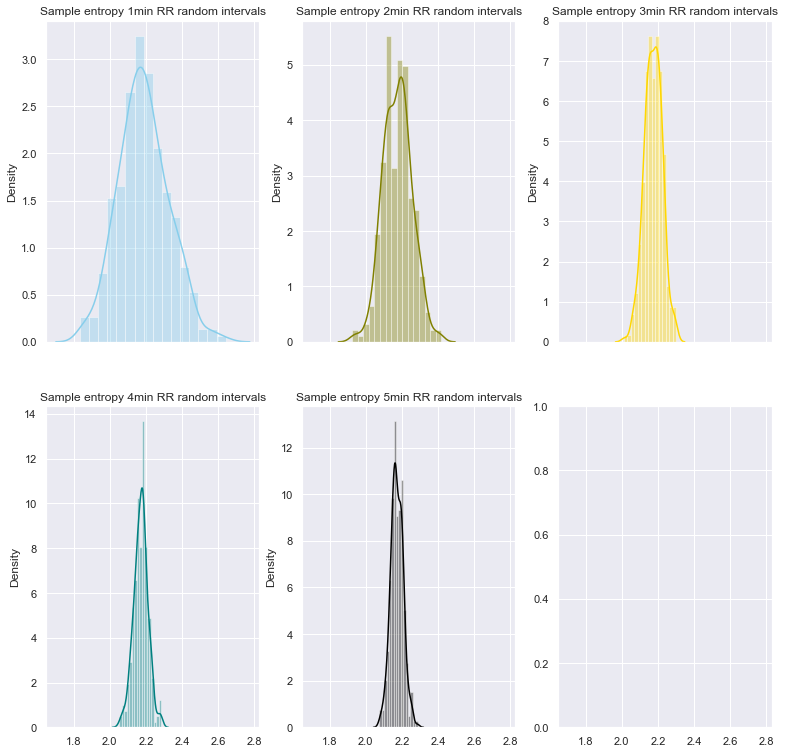

In [46]:
# Histograms der sample entropies generiert aus den random Zeitintervals(Minutenweise)
import seaborn as sns

sns.set_theme()
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=True)
sns.distplot(RR_1min_inter ,bins='auto', color="skyblue", ax=axes[0, 0]).set_title('Sample entropy 1min RR random intervals')
sns.distplot(RR_2min_inter ,bins='auto', color="olive", ax=axes[0, 1]).set_title('Sample entropy 2min RR random intervals')
sns.distplot(RR_3min_inter ,bins='auto', color="gold", ax=axes[0, 2]).set_title('Sample entropy 3min RR random intervals')
sns.distplot(RR_4min_inter ,bins='auto', color="teal", ax=axes[1, 0]).set_title('Sample entropy 4min RR random intervals')
sns.distplot(RR_5min_inter ,bins='auto', color="black", ax=axes[1, 1]).set_title('Sample entropy 5min RR random intervals')
#sns.distplot(RR_10min_inter ,bins='auto', color="red", ax=axes[1, 2]).set_title('Sample entropy 10min RR random intervals')
f.savefig('C:/Users/kamde/HRV/Histogram_Minute.png')

plt.show()


C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

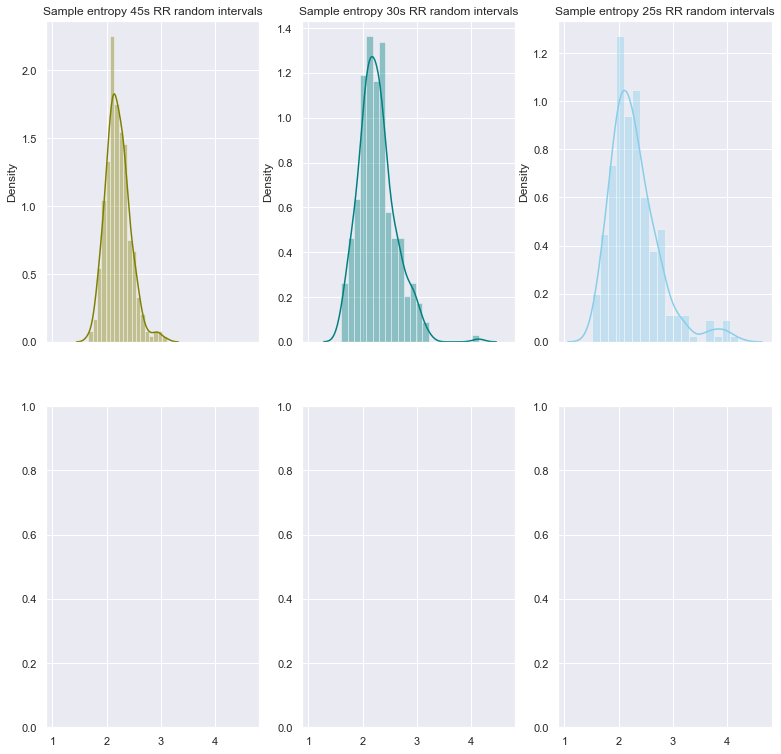

In [47]:
# Histograms der sample entropies generiert aus den random Zeitintervals(Sekundenweise)
sns.set_theme()
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=True)
sns.distplot(RR_45s_inter ,bins='auto', color="olive", ax=axes[0, 0]).set_title('Sample entropy 45s RR random intervals')
sns.distplot(RR_30s_inter ,bins='auto', color="teal", ax=axes[0, 1]).set_title('Sample entropy 30s RR random intervals')
sns.distplot(RR_25s_inter ,bins='auto', color="skyblue", ax=axes[0, 2]).set_title('Sample entropy 25s RR random intervals')
#sns.distplot(RR_20s_inter ,bins='auto', color="red", ax=axes[1, 0]).set_title('Sample entropy 20s RR random intervals')
#sns.distplot(RR_15s_inter ,bins='auto', color="gold", ax=axes[1, 1]).set_title('Sample entropy 15s RR random intervals')
#sns.distplot(RR_10s_inter ,bins='auto', color="black", ax=axes[1, 2]).set_title('Sample entropy 10s RR random intervals')
f.savefig('C:/Users/kamde/HRV/Histogram_Sekunden.png') #speichert alle plots unter der name Histogram_Sekunden
plt.show()
